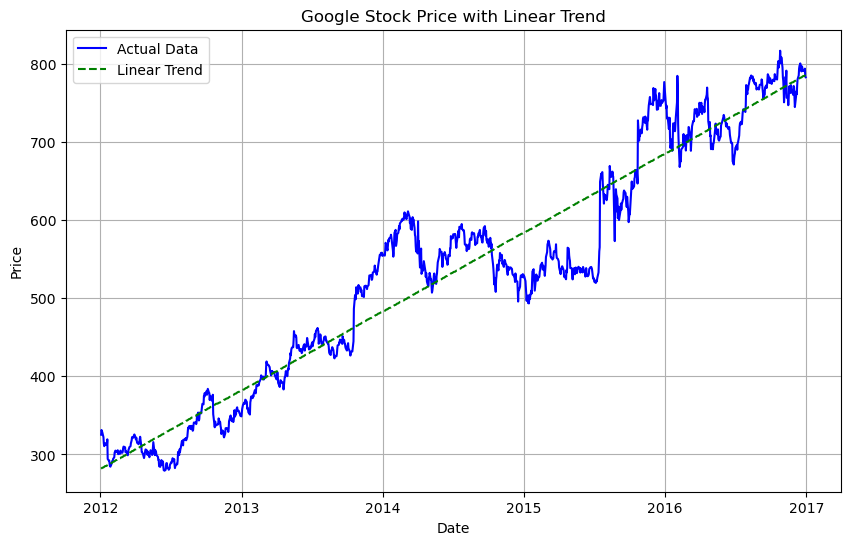

Linear Trend Equation: y = 0.40 * x + 281.73


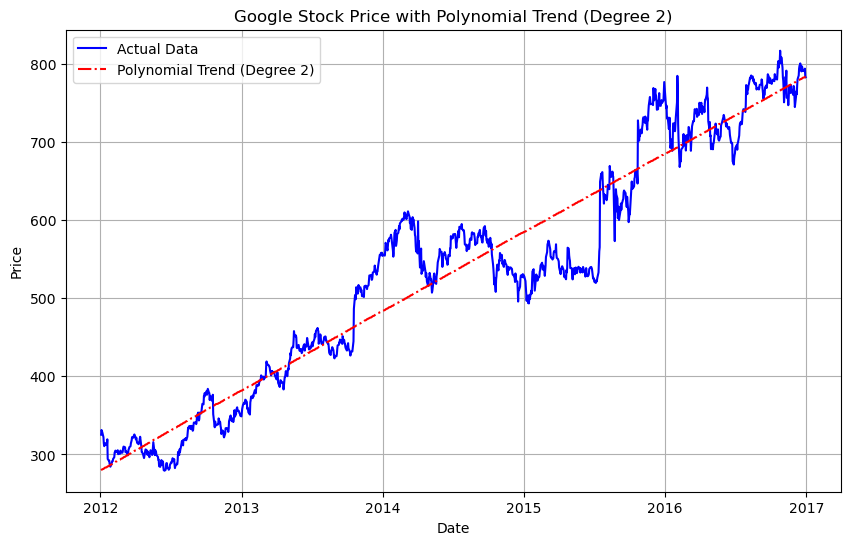

Polynomial Trend Equation (Degree 2): y = -0.00 * x^2 + 0.41 * x + 279.76


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the data from the CSV file
file_path = 'Google_Stock_Price_Train.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Use only numerical index for fitting models
data.reset_index(inplace=True)

# Extract the features and target
X = np.arange(len(data)).reshape(-1, 1)  # Days as feature
y = data['Open'].values  # Open prices as the target

# ------------------ Linear Trend Output ------------------

# Linear Trend
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)

# Plotting the actual data and linear trend
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], y, label='Actual Data', color='blue')
plt.plot(data['Date'], y_linear_pred, label='Linear Trend', linestyle='--', color='green')
plt.title('Google Stock Price with Linear Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# Print the linear trend equation
print(f"Linear Trend Equation: y = {linear_model.coef_[0]:.2f} * x + {linear_model.intercept_:.2f}")

# ------------------ Polynomial Trend (Degree 2) Output ------------------

# Polynomial Trend (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

# Plotting the actual data and polynomial trend
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], y, label='Actual Data', color='blue')
plt.plot(data['Date'], y_poly_pred, label='Polynomial Trend (Degree 2)', linestyle='-.', color='red')
plt.title('Google Stock Price with Polynomial Trend (Degree 2)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# Print the polynomial trend equation
print("Polynomial Trend Equation (Degree 2): y = {:.2f} * x^2 + {:.2f} * x + {:.2f}".format(
    poly_model.coef_[2], poly_model.coef_[1], poly_model.intercept_))
